**<center><font size=6>CS490: Machine Learning<br>Homework 5</font></center>**

<hr> 

In this assignment, you will be using decision trees, ensembles, and clustering to look at a dataset. 

Before we get started, let's include all of our libraries:

In [2]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<hr>

## Part 1: Decision Trees

The first learner we are going to look at are decision trees. In this problem, we will use our Kaggle in-class competition data to test decision trees on real data. We will be using the Boolean-valued classification given in column 1 of the Y data, rather than the real valued score in column 0. To enable us to do model selection, we will be splitting our  data into training and validation sets of roughly equal size. 

In [3]:
X = np.genfromtxt('data/X_train.txt', delimiter=None) 
Y = np.genfromtxt('data/Y_train.txt', delimiter=None) 

X,Y = ml.shuffleData(X[1:],Y[1:,1:])

# split into training and validation
[Xtr,Xva,Ytr,Yva] = ml.splitData(X,Y,0.50) 

**Print the minimum, maximum, mean, and variance of each of the first 5 features. <span style="color: deepskyblue;">(5 points)</span>**

In [13]:
# TODO: print min, max, mean, and variance of first 5 features
features = Xtr[:,1:6]  # skip first row because it is an id number
for i in range(5):
    print("Min:", features[:,i:i+1].min())
    print("Max:", features[:,i:i+1].max())
    print("Mean:", features[:,i:i+1].mean())
    print("Variance:", features[:,i:i+1].var())
    print("\n")



Min: 8.1476
Max: 18.1297
Mean: 13.110430737018424
Variance: 2.627555952706827


Min: 0.0
Max: 1.0
Mean: 0.43760469011725295
Variance: 0.24610682530463598


Min: 0.0
Max: 1.0
Mean: 0.7298994974874372
Variance: 0.19714622105502386


Min: 0.017874552
Max: 18.80961644
Mean: 2.287780158296901
Variance: 2.119872763090426


Min: 0.076548287
Max: 15.62659654
Mean: 1.844030345357203
Variance: 1.688558058411839




Now we can learn a decision tree classifier from the training data using the method implemented in the `mltools` package (this may take a minute). Set the maximum tree depth to 50 to avoid potential recursion limits or memory issues. 


**Learn a decision tree classifier and compute and report your decision tree’s training and validation error rates.<span style="color: deepskyblue;">(5 points)</span>**

In [16]:
# TODO: learn a decision tree with max depth 50
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)

# TODO: compute and report the learner's training and validation error rates
print("Training Error:", learner.err(Xtr, Ytr))
print("Validation Error:", learner.err(Xva, Yva))

Training Error: 0.0
Validation Error: 0.02554438860971524


Now try varying the `maxDepth` parameter, which forces the tree learning algorithm to stop after at most that many levels. 

**Test `maxDepth` values in the range `[0,1,2,...,15]`, and plot the training and validation error rates versus `maxDepth`. Do models with higher `maxDepth` have higher or lower complexity? What choice of `maxDepth` provides the best decision tree model? <span style="color: deepskyblue;">(10 points)</span>**

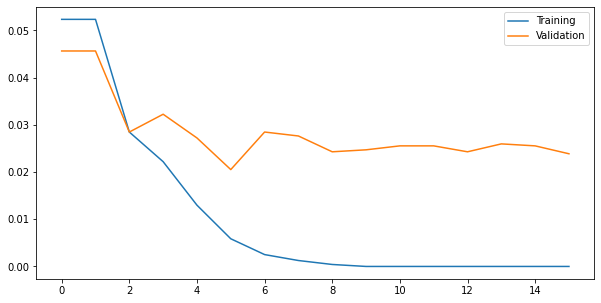

In [27]:
# TODO: learn decision trees with max depth ranging from 0 to 15
trainEr = []
valEr = []
maxDepths = []
for i in range(16):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=i)     # ml tools makes life easy
    trainEr.append(learner.err(Xtr, Ytr))
    valEr.append(learner.err(Xva, Yva))
    maxDepths.append(i)

# TODO: plot the training and validation error versus maxDepth
plt.plot(maxDepths, trainEr, label='Training')
plt.plot(maxDepths, valEr, label='Validation')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.show()

# divergence of training and validation error is around maxDepth = 2
# this is the location where the model is starting to be trained too closely to training data
# since the graph is not very complex at maxDepth = 2, we will use maxDepth = 5 as the divergence point
# since the error is the lowest here, assuming this is the point of divergence, the error will only increase from here

 The `minParent` parameter controls the complexity of decision trees by lower bounding the amount of data required to split nodes when learning. 
 
**Fixing `maxDepth=50`, compute and plot the training and validation error rates for `minParent` values in the range $2^{[0...12]} =$ `[1,2,4,8,...,4096]`. Do models with higher `minParent`
have higher or lower complexity? What choice of `minParent` provides the best decision tree model? <span style="color: deepskyblue;">(10 points)</span>**

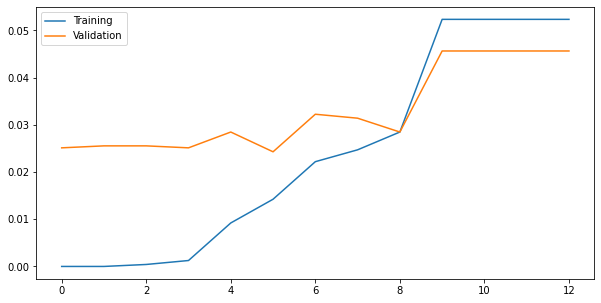

In [26]:
# TODO: learn a decision trees with maxParent ranging from 2^0 to 2^12, 
# increasing by powers of 2
trainErr = []
valErr = []
minParents = []
for i in range(13):
    exp = 2**i
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=exp)
    trainErr.append(learner.err(Xtr, Ytr))
    valErr.append(learner.err(Xva, Yva))
    minParents.append(i)
    
# TODO: plot the training and validation error versus maxDepth
plt.plot(minParents, trainErr, label='Training')
plt.plot(minParents, valErr, label='Validation')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.show()

# The relationship between minParent and complexity is inversely proportional
# as minParents go up, the model becomes less complex
# Thus, the lowest error for this data set is roughly minParent = 3

We can understand our model’s performance as we vary our preference for false positives compared to false negatives using the ROC curve, or summarize this curve using a scalar area under curve (AUC) score. 

**For the best decision tree model trained in the previous parts, use the `roc` function to plot an ROC curve summarizing your classifier performance on the training points, and another ROC curve summarizing your performance on the validation points. Then using the `auc` compute and report the AUC scores for the training and validation data. <span style="color: deepskyblue;">(10 points)</span>**

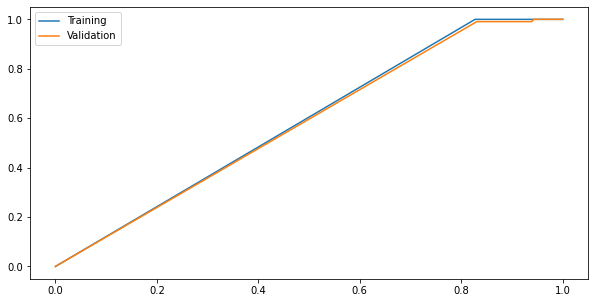

Training AUC: 0.9993000441891295
Validation AUC: 0.971025840240569


In [31]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=5, minParent=(2**3))

# TODO: compute and plot ROC curves for training and validation
XtrROC, YtrROC, c = learner.roc(Xtr, Ytr)
XvaROC, YvaROC, c = learner.roc(Xva, Yva)
plt.plot(XtrROC, YtrROC, label='Training');
plt.plot(XvaROC, YvaROC, label='Validation');
plt.rcParams["figure.figsize"] = (10,5)
plt.legend();
plt.show()

# TODO: compute and plot AUC for training and validation
print('Training AUC:', learner.auc(Xtr, Ytr))
print('Validation AUC:', learner.auc(Xva, Yva))

# 0.999 AUC for training is almost perfect
# 0.97 AUC seems to be fairly accurate for our training model

Based on your results in the previous parts, pick `maxDepth` and `minParent` values that you think will perform well. 

**Retrain your decision tree model using all the data in `X_train.txt`. Score your performance on the full dataset (error rate and AUC).<span style="color: deepskyblue;">(10 points)</span>**

In [35]:
# TODO: retrain your "best" classifier on the whole training dataset
Xtrain = X[:,1:]
Ytrain = Y
learner = ml.dtree.treeClassify(Xtrain, Ytrain, maxDepth=5, minParent=(2**3))


# TODO: compute error and AUC
error = learner.err(Xtrain, Ytrain)
auc = learner.auc(Xtrain, Ytrain)
print("Error (full dataset):", error)
print("AUC (full dataset):", auc)

Error (full dataset): 0.009212730318257957
AUC (full dataset): 0.9983750898546143


Using code like the following, you can make predictions on the test points (feature vectors found in `X_test.txt`), and export your predictions in the format required by Kaggle:

In [38]:
# Load X_test.txt
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

# Predict a probability of class 1
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T 

# Output a file with two columns, a unique ID and a probability of class 1
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='Unique Id,DIST',delimiter=',')

Note that we use `predictSoft` to output probabilistic predictions (that test examples are members of class 1) for upload to Kaggle. While you may also use “hard” predictions (class values), accounting for the learned model’s confidence in each prediction will produce a smoother ROC curve and (usually) a better AUC score.

<hr>

## Part 2: Ensembles

Now we will use our decision trees to create ensembles, hopefully improving performance. You can choose either part of this question to answer (your choice): a random forest classifier, which is a bagged ensemble of decision trees; or a boosted ensemble of regression trees learned with gradient boosting.
In Python, it is easy to keep a list of different learners, even of different types, for use in an ensemble predictor:

In [20]:
# ensemble[i] = ml.treeClassify(Xb,Yb,...) # save ensemble member "i" in a cell array
# ...
# ensemble[i].predict(Xv,Yv); # find the predictions for ensemble member "i"

<hr>

### Option 1: Random Forests

Random Forests are bagged collections of decision trees, which select their decision nodes from randomly chosen subsets of the possible features (rather than all features). You can implement this easily in `treeClassify` using option `nFeatures`=k, where k is the number of features to select from (e.g., k = 15 or k = 25 if there are 35 features); you’ll write a for-loop to build the ensemble members, and another to compute the prediction of the ensemble.

**Using your training/validation split from above, learn a bagged ensemble of decision trees on the training data and plot the training and validation error as a function of the number of learners in the ensemble for (at least) 1, 5, 10, and 25 learners. <span style="color: deepskyblue;">(20 points)</span>** 

For your individual learners, use little complexity control (depth cutoff 15+, minLeaf 4, etc.), since the bagging will be used to control overfitting instead. For the bootstrap process, draw the same number of data as in your training set after the validation split (M′ = M in the pseudocode). You may find ml.bootstrapData() helpful, although it is very easy to do yourself. When computing your performance, you may find it more computationally efficient to simply learn 25 ensemble members first, and then evaluate the results using only a few of them; this will give the same results as only learning the few that you need and you can keep reusing models as needed.



In [41]:
M = Xtr.shape[0] # Number of training points
Mv= Xva.shape[0] # Number of validation points

# set up our random forest
rforest = [None]*25

# Predictions on training and validation data
YtHat = np.zeros((M,25))
YvHat = np.zeros((Mv,25))


for l in range(25):
    Xi,Yi = ml.bootstrapData(Xtr,Ytr, M)    # draw this member's random sample of data
    
    # TODO: learn a decision tree classifier rforest[l] using maxDepth = 15 and
    # nFeatures = some subset of the number of X features
    rforest[l] = ml.dtree.treeClassify(Xi, Yi, maxDepth=15,nFeatures=20)

    # TODO: predict the values for YtHat and YvHat (using either predict to get
    # class values 1 or 0 or using predictSoft to get a proability of class 1)
    YtHat[:,l] = rforest[l].predict(Xtr)
    YvHat[:,l] = rforest[l].predict(Xva)
    
    
# combine these learners in different ensembles and compute the error
for l in [1,5,10,15]:
    # Make the prediction (mean of columns 0...l-1) and score the MSE for
    # training and validation 
    YtrainPred = YtHat[:,0:l].mean(axis=1)
    YvalPred = YvHat[:,0:l].mean(axis=1)
    
    trainErr = ((YtrainPred-Ytr)**2).mean()    # MSE = sum((yPred - yHat)^2)/M
    valErr = ((YvalPred-Yva)**2).mean()
    
    print("Ensemble of", l)
    print('Training Error:', trainErr)
    print('Validation Error:', valErr, "\n")
    

Ensemble of 1
Training Error: 0.011306532663316583
Validation Error: 0.026381909547738693 

Ensemble of 5
Training Error: 0.0033668341708542717
Validation Error: 0.013852596314907872 

Ensemble of 10
Training Error: 0.0024623115577889453
Validation Error: 0.012022613065326634 

Ensemble of 15
Training Error: 0.0022240833798622744
Validation Error: 0.01156895589056393 



You can now choose an ensemble that performed well, train it on the full `X_train.txt` and submit its results for `X_test.txt` to Kaggle!

<hr>

### Option 2: Gradient Boosting

Gradient boosted trees are boosted collections of decision trees, which are built sequentially to predict the residual error in the current ensemble. You’ll write a for-loop to build the ensemble members, and another to compute the prediction of the ensemble.
Since this is a classification problem, we will do gradient boosting on a logistic negative log likelihood loss, i.e., we will regress the log-odds ratio in a manner similar to logistic regression (except that, instead of a linear regression on the log-odds, we will use a collection of decision trees). Use `treeRegress` to fit each learner to the (real-valued) log-odds update; treeRegress works analagously to `treeClassify`.

In practice, start out with a baseline predictor $f(x) = 0$, and compute probabilies $p(y = 1) = \sigma(f(x))$ where $\sigma$ is the usual logistic function. Then, update $f(x)$ by regressing the derivative of $J$:

\begin{equation*}
\frac{dJ^{(i)}}{df^{(i)}} = \begin{cases} 1-\sigma(f(x^{(i)})) & y^{(i)}=1 \\
-\sigma(f(x^{(i)})) & y^{(i)}=0 \end{cases}
\end{equation*}

Fit $dJ$ using a regression tree $t(x)$, and update $f(x) = f(x) + \alpha t(x)$ for some step size $\alpha$.

**Using your training/validation split from above, learn a gradient boosted ensemble of decision trees on the training data and plot the training and validation error as a function of the number of learners in the ensemble for (at least) 1, 5, 10, and 25 learners. <span style="color: deepskyblue;">(20 points)</span>** 

For your individual learners, use very strong complexity control (depth cutoff 2–3, or large minParent, etc.), since the boosting process will be adding complexity to the overall learner. When computing your performance, you may find it more computationally efficient to simply learn 25 ensemble members first, and then evaluate the results using only a few of them; this will give the same results as only learning the few that you need and you can keep reusing models as needed.


In [ ]:
M = Xtr.shape[0] # Number of training points
Mv= Xva.shape[0] # Number of validation points

nEns = 50   # size of the ensemble
ensemble = [None]*nEns # Set up the ensemble

# Predictions on training and validation data
YtHat = np.zeros((M,nEns))
YvHat = np.zeros((Mv,nEns))

# Define our logistic sigmoid function
def sigma(z): return np.exp(-z)/(1.+np.exp(-z))


f = np.zeros(Ytr.shape)
alpha = 1   # set step size

for l in range(nEns):             # this is a lot faster than the bagging loop:
   # calculate gradient for this learner
    dJ = 1.*Ytr - sigma(f)   
    
    # TODO: learn a decision tree classifier ensemble[l] using maxDepth = 3
    
    
    # TODO: Update f(x) for the next learner by subtracting out the values predicted by
    # the current learner * step size
    
    
    
    # TODO: predict the values for YtHat and YvHat 
   
 
    
# Now predict for various numbers of boosted learners:
for l in [1,5,10,25,nEns]:
    # Prediction on the training data
    pT = sigma(YtHat[:,0:l].sum(axis=1))
    
    # TODO: Prediction on validation data
    
    # Negative Log-likelihood for training data
    nllT = -(np.log(pT)*Ytr + np.log(1-pT)*(1-Ytr)).mean()
    
    # TODO: nll on validation data
    
    
    # Error on training data (on average how often was the prediction above 0.5, which
    # would round up to a class of 1)?
    errT = (Ytr != (pT>.5)).mean()
    
    # TODO: Validation error

You can now choose an ensemble that performed well, train it on the full `X_train.txt` and submit its results for `X_test.txt` to Kaggle!

<hr>

## Part 3: Clustering

In this problem, you will experiment with two clustering algorithms implemented in the updated `mltools` package: k-means and agglomerative clustering. 

**Load the standard Iris dataset, select the first two features, and ignore the class (or Y) variables. Plot the data and see for yourself how “clustered” you think it looks. Include the plot, say how many clusters you think exist, and briefly explain why. (There are multiple reasonable answers to this question.) <span style="color: deepskyblue;">(5 points)</span>** 


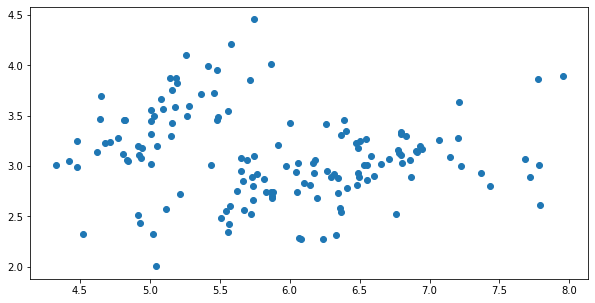

In [46]:
# Data Loading--Just load the first 2 classes 
iris = np.genfromtxt("data\iris.txt",delimiter=None)  # load the text file
X = iris[:,0:2]            # features are the other columns; only use the first 2


# TODO: Plot the Iris Data and visually inspect the data
plt.scatter(X[:,0], X[:,1:])    # omit id numbers


**Run k-means on the first two features of the Iris data, for k = 2, k = 5, and k = 20. Try multiple (at least 5) different initializations for each k, and check to see whether they find the same solution; if not, pick the one with the best score. For the best clustering for each candidate k, create a plot with the data colored by assignment, and the cluster centers. You can plot the points colored by cluster assignments z using
ml.plotClassify2D(None,X,z) . (You will need to also plot the cluster centers yourself.) <span style="color: deepskyblue;">(10 points)</span>** 

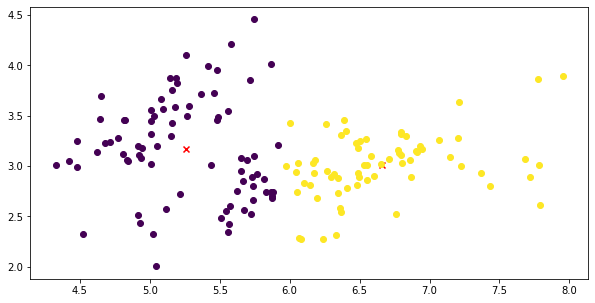

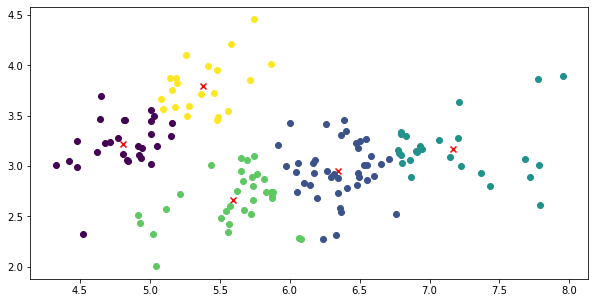

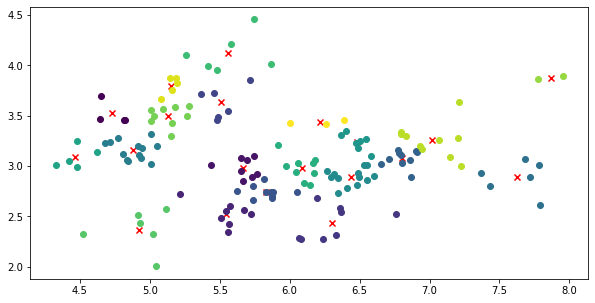

In [48]:
# k-means, k=2
ks = [2, 5, 20]
# initialize the error (sum of squares distance from all points to their cluster center)
# to infinity
ssd = np.inf

for k in ks:
    # train with 5 different initializations
    for it in range(5):
    
        # TODO: run kmeans for this iteration 
        # returns Zi: array of cluster values for each X for iteration i, 
        # mui: mean of clusters found by iteration i, and
        # ssdi = sum of squares error for iteration i
        Zi, mui, ssdi = ml.cluster.kmeans(X, k)
    
        # If this initialization produced an overall better clustering than our best so far,
        # save this one as the best
        if ssdi < ssd:
            Z,mu,ssd = Zi,mui,ssdi
        
    # Now, plot the data and their cluster ID as color:
    ml.plotClassify2D(None,X,Z)
    plt.scatter(mu[:,0], mu[:,1], c='r', marker='x')
    plt.show()

In [ ]:
# TODO: Repeat for k = 5 and k = 20
# performed above
# Isn't lazy programming considered efficient?

**Run agglomerative clustering on the first two features of the Iris data, first using single linkage and then again using complete linkage, using the algorithms implemented in `ml.cluster.agglomerative` from `cluster.py`. For each linkage criterion, plot the data colored by their assignments to 2, 5, and 20 clusters. (Agglomerative clustering does not require an initialization, so there is no need to run methods multiple
times.) <span style="color: deepskyblue;">(10 points)</span>** 


Single Linkage:
K =  2


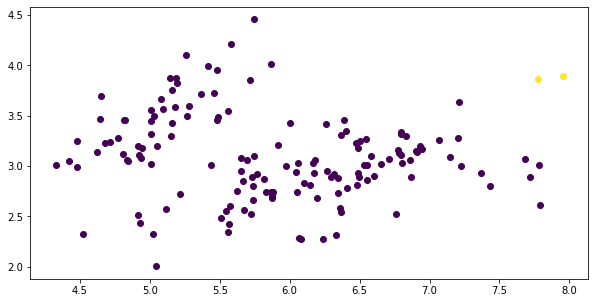

Single Linkage:
K =  5


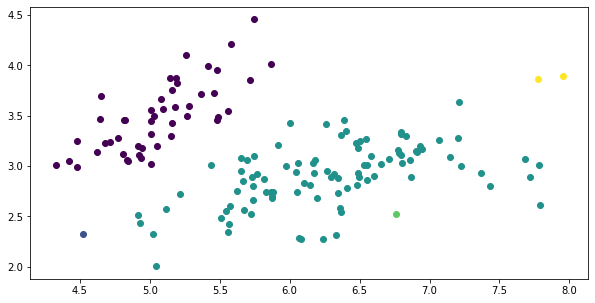

Single Linkage:
K =  20


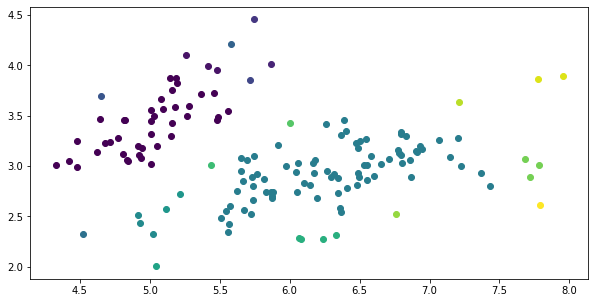

Complete Linkage:
K =  2


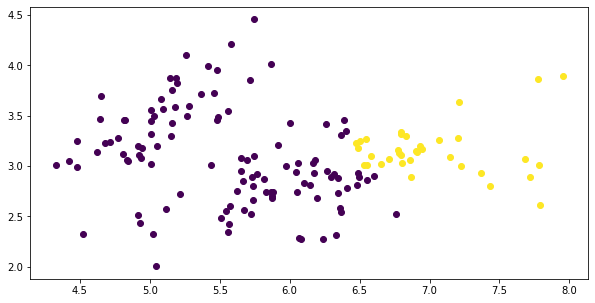

Complete Linkage:
K =  5


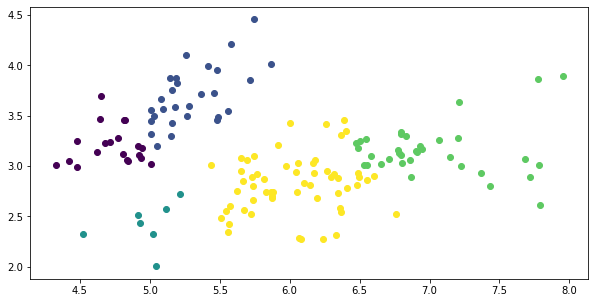

Complete Linkage:
K =  20


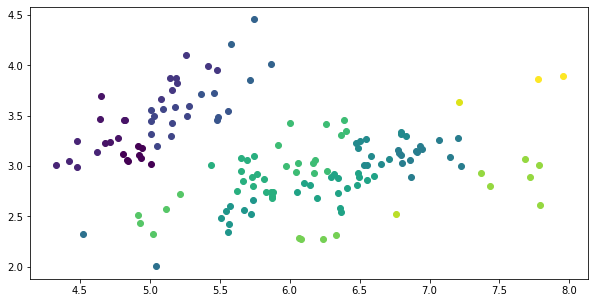

In [54]:
# agglomerative clustering using single linkage and k = 2


# TODO: repeat for k = 5 and k = 20 as well as all using complete linkage

for k in ks:
    print("Single Linkage:")
    print("K = ", k)
    Z,dend = ml.cluster.agglomerative(X, K=k, method='min') 
    plt.figure()
    ml.plotClassify2D(None,X,Z)
    plt.show()
    
for k in ks:
    print("Complete Linkage:")
    print("K = ", k)
    Z,dend = ml.cluster.agglomerative(X, K=k, method='max')    # ml tools makes life easy
    plt.figure()
    ml.plotClassify2D(None,X,Z)
    plt.show()
    
    

**Briefly discuss similarities and differences in the outputs of the agglomerative clustering and k-means
algorithms.<span style="color: deepskyblue;"> (5 points)</span>** 

The k means section produced more evenly dispersed clusters where the agglomerative clustering produced more imbalanced clusters.  As k is increased, the k means models started seperating the clusters and there was more overlap between clusters.  This was exactly the opposite for agglomerative, all of the data points were closer to each other in their feature values.

# Acknowledgments
I, Christopher Pawlenok, recieved help for the random forest section from Seth Falvey.  Besides that problem, all work
 on this homework is mine and mine only.